In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Problem Set 2


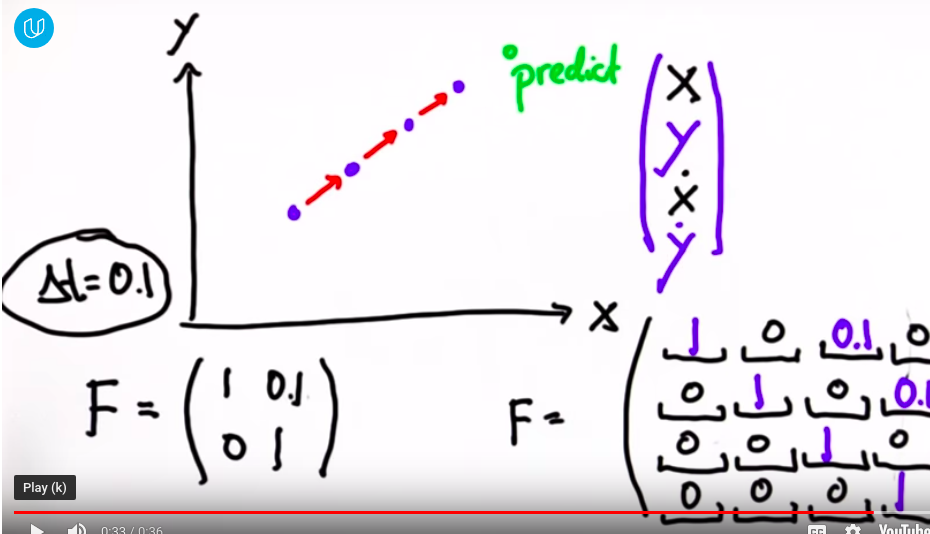



The above is the 4D next state function (state transition matrix) for movements in 2D, x and y with velocities x_dot and y_dot.  On the left is the old state function F for 1D with time interval delta_t of 0.1 mapped in.  

In [17]:
# Fill in the matrices P, F, H, R and I at the bottom
#
# This question requires NO CODING, just fill in the 
# matrices where indicated. Please do not delete or modify
# any provided code OR comments. Good luck!

from math import *

class matrix:
    
    # implements basic operations of a matrix class
    
    def __init__(self, value):
        self.value = value
        self.dimx = len(value)
        self.dimy = len(value[0])
        if value == [[]]:
            self.dimx = 0
    
    def zero(self, dimx, dimy):
        # check if valid dimensions
        if dimx < 1 or dimy < 1:
            raise ValueError("Invalid size of matrix")
        else:
            self.dimx = dimx
            self.dimy = dimy
            self.value = [[0 for row in range(dimy)] for col in range(dimx)]
    
    def identity(self, dim):
        # check if valid dimension
        if dim < 1:
            raise ValueError("Invalid size of matrix")
        else:
            self.dimx = dim
            self.dimy = dim
            self.value = [[0 for row in range(dim)] for col in range(dim)]
            for i in range(dim):
                self.value[i][i] = 1
    
    def show(self):
        for i in range(self.dimx):
            print (self.value[i])
        print (' ')
    
    def __add__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError("Matrices must be of equal dimensions to add")
        else:
            # add if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] + other.value[i][j]
            return res
    
    def __sub__(self, other):
        # check if correct dimensions
        if self.dimx != other.dimx or self.dimy != other.dimy:
            raise ValueError("Matrices must be of equal dimensions to subtract")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, self.dimy)
            for i in range(self.dimx):
                for j in range(self.dimy):
                    res.value[i][j] = self.value[i][j] - other.value[i][j]
            return res
    
    def __mul__(self, other):
        # check if correct dimensions
        if self.dimy != other.dimx:
            raise ValueError("Matrices must be m*n and n*p to multiply")
        else:
            # subtract if correct dimensions
            res = matrix([[]])
            res.zero(self.dimx, other.dimy)
            for i in range(self.dimx):
                for j in range(other.dimy):
                    for k in range(self.dimy):
                        res.value[i][j] += self.value[i][k] * other.value[k][j]
            return res
    
    def transpose(self):
        # compute transpose
        res = matrix([[]])
        res.zero(self.dimy, self.dimx)
        for i in range(self.dimx):
            for j in range(self.dimy):
                res.value[j][i] = self.value[i][j]
        return res
    
    # Thanks to Ernesto P. Adorio for use of Cholesky and CholeskyInverse functions
    
    def Cholesky(self, ztol=1.0e-5):
        # Computes the upper triangular Cholesky factorization of
        # a positive definite matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        for i in range(self.dimx):
            S = sum([(res.value[k][i])**2 for k in range(i)])
            d = self.value[i][i] - S
            if abs(d) < ztol:
                res.value[i][i] = 0.0
            else:
                if d < 0.0:
                    raise ValueError("Matrix not positive-definite")
                res.value[i][i] = sqrt(d)
            for j in range(i+1, self.dimx):
                S = sum([res.value[k][i] * res.value[k][j] for k in range(self.dimx)])
                if abs(S) < ztol:
                    S = 0.0
                try:
                   res.value[i][j] = (self.value[i][j] - S)/res.value[i][i]
                except:
                   raise ValueError("Zero diagonal")
        return res
    
    def CholeskyInverse(self):
        # Computes inverse of matrix given its Cholesky upper Triangular
        # decomposition of matrix.
        res = matrix([[]])
        res.zero(self.dimx, self.dimx)
        
        # Backward step for inverse.
        for j in reversed(range(self.dimx)):
            tjj = self.value[j][j]
            S = sum([self.value[j][k]*res.value[j][k] for k in range(j+1, self.dimx)])
            res.value[j][j] = 1.0/tjj**2 - S/tjj
            for i in reversed(range(j)):
                res.value[j][i] = res.value[i][j] = -sum([self.value[i][k]*res.value[k][j] for k in range(i+1, self.dimx)])/self.value[i][i]
        return res
    
    def inverse(self):
        aux = self.Cholesky()
        res = aux.CholeskyInverse()
        return res
    
    def __repr__(self):
        return repr(self.value)


########################################

def filter(x, P):
    for n in range(len(measurements)):
        
        # prediction/estimate
        # x = initial x, init y, u=external motion
        x = (F * x) + u
        #uncertainty covariance (Kalman gain so should decrease for x, y, x_dot, y_dot)
        # uncertainty * state transition matrix and multiplied again
        P = F * P * F.transpose() 
        
        # measurement update (given)
        Z = matrix([measurements[n]])
        #error term for measurement update
        y = Z.transpose() - H * x #transposed H
        #error mapped into matrix s obtained by projecting system uncertainty into measurement space
        #using the measurement function projection, R is measurement noise
        # in the KF tutorial, R could be + or - by noise amount
        S = H * P * H.transpose() + R 
        #then map inot variable K, the Kalman gain
        K = P * H.transpose() * S.inverse()
        # update estimate and uncertainty
        x = x + (K * y)
        # update P 
        P = (I - (K * H)) * P
    
    print ('x= ')
    x.show()
    print ('P= ')
    P.show()

########################################

print ("### 4-dimensional example ###")

measurements = [[5., 10.], [6., 8.], [7., 6.], [8., 4.], [9., 2.], [10., 0.]]
initial_xy = [4., 12.]

# measurements = [[1., 4.], [6., 0.], [11., -4.], [16., -8.]]
# initial_xy = [-4., 8.]

# measurements = [[1., 17.], [1., 15.], [1., 13.], [1., 11.]]
# initial_xy = [1., 19.]

# measurement is every 0.1 time interval so a change in measurement from 5 to 6 is 10, not 1
dt = 0.1

x = matrix([[initial_xy[0]], [initial_xy[1]], [0.], [0.]]) # initial state (location and unknown velocity)
u = matrix([[0.], [0.], [0.], [0.]]) # external motion, external change of the motion, ie. have control over motion (acceleration)

#### DO NOT MODIFY ANYTHING ABOVE HERE ####
#### fill this in, remember to use the matrix() function!: ####

# initial uncertainty: 0 for positions x and y, 1000 for the two velocities
P =  matrix([[0.,0.,0.,0.], 
             [0,0.,0.,0.],
             [0.,0.,1000.,0.],
             [0.,0.,0.,1000.]]) #given
# next state function: generalize the 2d version to 4d
F =  matrix([[1.,0.,dt,0.], #because we want x' = x + (x_dot * dt)
             [0.,1.,0.,dt],
             [0.,0.,1.,0.],
             [0.,0.,0.,1.]])
# measurement function: (go from 4D to 2D) reflect the fact that we observe x and y but not the two velocities
H =  matrix([[1.,0.,0.,0.],
             [0.,1.,0.,0.]])
# measurement uncertainty: use 2x2 matrix with 0.1 as main diagonal
R = matrix([[0.1,0.], 
            [0.,0.1]])
# 4d identity matrix
I = matrix([[1.,0.,0.,0.],
            [0.,1.,0.,0.],
            [0.,0.,1.,0.],
            [0.,0.,0.,1.]])

###### DO NOT MODIFY ANYTHING HERE #######

filter(x, P)


### 4-dimensional example ###
x= 
[9.999340731787717]
[0.001318536424568617]
[9.998901219646193]
[-19.997802439292386]
 
P= 
[0.03955609273706198, 0.0, 0.06592682122843721, 0.0]
[0.0, 0.03955609273706198, 0.0, 0.06592682122843721]
[0.06592682122843718, 0.0, 0.10987803538073201, 0.0]
[0.0, 0.06592682122843718, 0.0, 0.10987803538073201]
 
